In [2]:
#%pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\bzw10\School\SP23\CS4300\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import json
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("sample.csv")

In [5]:
print(df.columns)
categories_and_useful = df.loc[:, ["categories", "name", "useful"]]
print(categories_and_useful)
# df.columns

Index(['Unnamed: 0', 'stars_review', 'useful', 'funny', 'cool', 'text', 'date',
       'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars_business', 'review_count', 'is_open', 'attributes',
       'categories', 'hours', 'name_user', 'review_count_user',
       'yelping_since', 'useful_user', 'funny_user', 'cool_user', 'elite',
       'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')
                                             categories  \
0     Sandwiches, Cafes, Coffee & Tea, Restaurants, ...   
1     American (Traditional), Steakhouses, Nightlife...   
2     American (New), Restaurants, Tacos, Mexican, L...   
3     Coffee & Tea, Food, Japanese, Restaurants, Chi...   
4          Restaurants, French, I

In [46]:
categories_and_useful = categories_and_useful.dropna()

accum = {}
counts = {}
seen_restaurants = set()

for index, row in categories_and_useful.iterrows():
    categories = row["categories"]
    score = row["useful"]
    restaurant = row["name"]
    categories = categories.split(", ")
    
    # go through each category for the restaurant
    for category in set(categories):
        # if category not seen, add it to accum and counts
        if category not in accum.keys():
            accum[category] = 0
            counts[category] = 0
        # increment the score for the category
        accum[category] += score
        # if the restaurant is not a repeat or if the category count is empty, increment
        if restaurant not in seen_restaurants or counts[category] == 0: 
            counts[category] += 1

    # mark restaurant as visited
    if restaurant not in seen_restaurants: 
        seen_restaurants.add(restaurant) 
    

# print(counts)
# categories_score_dict = {key: float(accum[key])/counts[key] for key in counts}
# print(categories_score_dict)
# categories_avg_usefulness = pd.DataFrame.from_dict(categories_score_dict, orient="index", columns=["useful"])
# print(categories_avg_usefulness)
# print(categories_avg_usefulness.columns)

In [54]:
categories_counts = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"])


# print(categories_counts)

# print(categories_counts.index)

categories_scores = pd.DataFrame.from_dict(accum, orient="index", columns=["scores"])
# print(categories_scores)

joined_counts_scores = categories_counts.join(categories_scores)

print(joined_counts_scores)
top_30_categories = joined_counts_scores.sort_values(by=['counts'], ascending=False).head(30)
# top_30_categories = categories_counts.head(30)

                               counts  scores
Coffee & Tea                       78     115
Sandwiches                        106     155
Mediterranean                      27      58
American (New)                    144     224
Restaurants                       728    1100
...                               ...     ...
Photography Stores & Services       1       0
Self Storage                        1       7
Polish                              1       0
Barre Classes                       1       0
Pilates                             1       0

[503 rows x 2 columns]


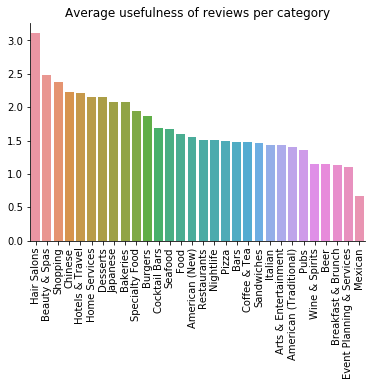

In [58]:
# joined.plot(kind='bar')
avg_scores = top_30_categories["scores"]/top_30_categories["counts"]

avg_scores = avg_scores.sort_values(ascending=False)
# print(avg_scores.sort_values(ascending=False))

sns.barplot(x=avg_scores.index, y=avg_scores.values)
plt.xticks(rotation=90)
plt.title("Average usefulness of reviews per category")
sns.despine()
plt.show()

In [ ]:
temp = []
file = open("yelp_academic_dataset_review.json", "r")
for line in tqdm(file.readlines()):
    temp.append(json.loads(line))
review_df = pd.DataFrame(temp)
review_df

In [ ]:
review_df.to_csv("reviews.csv")

In [ ]:
temp = []
file = open("yelp_academic_dataset_business.json", "r")
for line in tqdm(file.readlines()):
    temp.append(json.loads(line))
business_df = pd.DataFrame(temp)
business_df

In [ ]:
business_df.to_csv("business.csv")

In [ ]:
phl_business = business_df[business_df["city"] == "Philadelphia"]
phl_business

In [ ]:
b_r_df = pd.merge(review_df, phl_business, on="business_id", suffixes=("_review", "_business"))
b_r_df

In [ ]:
temp = []
file = open("yelp_academic_dataset_user.json", "r")
for line in tqdm(file.readlines()):
    temp.append(json.loads(line))
user_df = pd.DataFrame(temp)
user_df

In [ ]:
user_df.to_csv("users.csv")

In [ ]:
b_r_u_df = pd.merge(b_r_df, user_df, on="user_id", suffixes=("_user", ""))
b_r_u_df

In [ ]:
final_cleaned = b_r_u_df.drop(["business_id", "user_id", "review_id"], axis=1)
final_cleaned

In [ ]:
final_cleaned.to_csv("data.csv")

In [ ]:
sample = final_cleaned.sample(1500)
sample

In [ ]:
sample.to_csv("sample.csv")